<a href="https://colab.research.google.com/github/JuliaJakimowicz/SystemyUczaceSieAnalizaDanych/blob/main/Lab_4_teoria_i_praktyka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regresja i Metody Optymalizacji

**Cel materiału:**   
- Regresja liniowa  
- Gradient prosty  
- Regresja wielomianowa  
- Krzywe uczenia  
- Regularyzowane modele liniowe
- Regresja logistyczna



# 1. Regresja Liniowa

**Regresja liniowa** jest jedną z najprostszych i najczęściej stosowanych metod w statystyce i uczeniu maszynowym. Jej głównym założeniem jest istnienie liniowego związku między zmiennymi objaśniającymi (cechami, $x$) a zmienną objaśnianą ($y$). Dzięki temu model regresji liniowej można opisać równaniem prostej, które pozwala prognozować wartość $y$ na podstawie $x$.

### Model Liniowy

Model liniowy zapisujemy wzorem:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

gdzie:
- $ \theta_0 $ to wyraz wolny (intercept), przesuwający prostą w górę lub w dół,
- $ \theta_1 $ to współczynnik kierunkowy (slope), określający nachylenie prostej.

### Funkcja Kosztu

Aby dopasować model do danych, używamy funkcji kosztu, która mierzy różnicę między wartościami przewidywanymi przez model a rzeczywistymi wartościami. Dla regresji liniowej najczęściej stosowaną funkcją kosztu jest **średni błąd kwadratowy (Mean Squared Error, MSE)**, definiowany jako:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

gdzie:
- $ m $ oznacza liczbę przykładów w zbiorze treningowym,
- $ h_\theta(x^{(i)}) $ to wartość przewidywana dla $i$-tego przykładu,
- $ y^{(i)} $ to rzeczywista wartość dla $i$-tego przykładu.

Wprowadzenie czynnika $\frac{1}{2}$ (lub $\frac{1}{2m}$) upraszcza obliczenia pochodnych przy optymalizacji, np. przy użyciu algorytmu gradient descent.

### Założenia Regresji Liniowej

Aby model regresji liniowej działał poprawnie, przyjmuje się kilka podstawowych założeń:
1. **Liniowość:** Związek między zmiennymi objaśniającymi a zmienną objaśnianą jest liniowy.
2. **Niezależność:** Przykłady w zbiorze danych są niezależne od siebie.
3. **Homoskedastyczność:** Wariancja błędu jest stała dla wszystkich poziomów zmiennych objaśniających.
4. **Brak silnej wielokolinearności:** Zmienne objaśniające nie są silnie skorelowane między sobą.

### Proces Dopasowywania Modelu

Dopasowanie modelu polega na znalezieniu takich wartości parametrów $ \theta_0 $ i $ \theta_1 $, które minimalizują funkcję kosztu $ J(\theta) $. Do tego celu stosuje się:
- **Metodę najmniejszych kwadratów (Normal Equation):** Metoda analityczna umożliwiająca bezpośrednie obliczenie optymalnych parametrów.
- **Metody iteracyjne, np. Gradient Descent:** Szczególnie przydatne w przypadku dużych zbiorów danych, gdzie metoda analityczna może być nieefektywna.

### Interpretacja Modelu

- **Współczynnik $ \theta_1 $:** Określa, jak zmienia się wartość $y$ przy jednostkowej zmianie $x$. Jeśli $ \theta_1 $ jest dodatni, wzrost $x$ powoduje wzrost $y$; jeśli jest ujemny, to $y$ maleje.
- **Wyraz wolny $ \theta_0 $:** Reprezentuje prognozowaną wartość $y$ dla $x = 0$ (jeśli interpretacja taka ma sens w danym kontekście).

---




Współczynniki modelu: 2.1075480787733727 2.885056693219243
Mean Squared Error: 0.20164614099176337


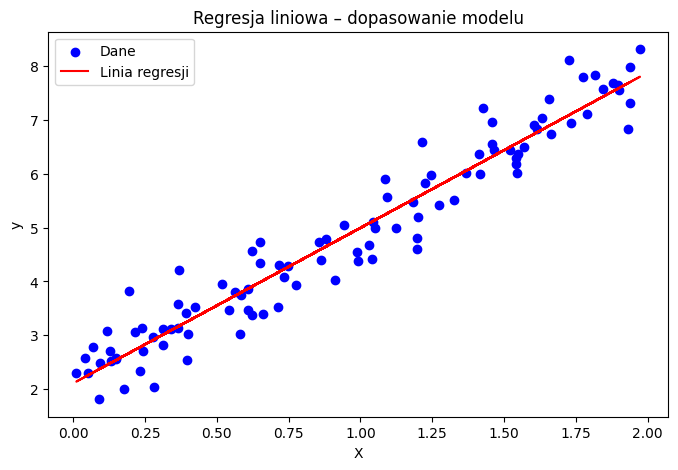

In [18]:
# Import potrzebnych bibliotek
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Ustawienia wizualizacji
plt.style.use('default')
np.random.seed(42)

# Generowanie danych: y = 3x + 2 + szum
m = 100
X = 2 * np.random.rand(m, 1)
y = 3 * X[:, 0] + 2 + np.random.randn(m) * 0.5

# Dopasowanie modelu regresji liniowej
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Obliczenie błędu MSE
mse = mean_squared_error(y, y_pred)
print("Współczynniki modelu:", lin_reg.intercept_, lin_reg.coef_[0])
print("Mean Squared Error:", mse)

# Wizualizacja danych i linii regresji
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Dane')
plt.plot(X, y_pred, color='red', label='Linia regresji')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresja liniowa – dopasowanie modelu")
plt.legend()
plt.show()


## 2. Gradient Prosty (Gradient Descent)


Gradient Prosty to metoda optymalizacji wykorzystywana do minimalizacji funkcji kosztu, która mierzy rozbieżność między wartościami przewidywanymi przez model a rzeczywistymi danymi.  
Idea polega na iteracyjnym aktualizowaniu parametrów modelu w kierunku przeciwnym do gradientu funkcji kosztu, co pozwala na stopniowe zbliżanie się do minimum tej funkcji.

Dla regresji liniowej model opisujemy równaniem:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

Funkcja kosztu (średni błąd kwadratowy, Mean Squared Error) definiowana jest jako:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right)^2
$$

Gradient descent aktualizuje parametry według wzoru:

$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$

gdzie:
- $\theta_j$ to $j$-ty parametr modelu,
- $\alpha$ to współczynnik uczenia, który kontroluje wielkość kroku aktualizacji,
- $m$ to liczba przykładów treningowych.

#### Kluczowe punkty:
- **Kierunek aktualizacji:** Gradient funkcji kosztu wskazuje kierunek najszybszego wzrostu błędu. Odejmując ten gradient, przesuwamy się w kierunku, w którym funkcja kosztu maleje.
- **Wybór współczynnika uczenia ($\alpha$):**  
  - Zbyt duża wartość $\alpha$ może spowodować niestabilność i „przeskakiwanie” minimum funkcji kosztu.
  - Zbyt mała wartość sprawi, że zbieżność będzie bardzo wolna.
- **Typy gradient descent:**  
  - **Batch Gradient Descent:** Używa całego zbioru danych do obliczenia gradientu, co daje stabilne, ale potencjalnie kosztowne obliczeniowo aktualizacje.
  - **Stochastic Gradient Descent (SGD):** Aktualizacje wykonywane są po każdym przykładzie, co wprowadza losowość i może przyspieszyć proces, ale czyni go bardziej niestabilnym.
  - **Mini-batch Gradient Descent:** Łączy zalety obu podejść, aktualizując parametry na małych partiach danych.


Optymalne theta: [2.02327473 2.95946548]


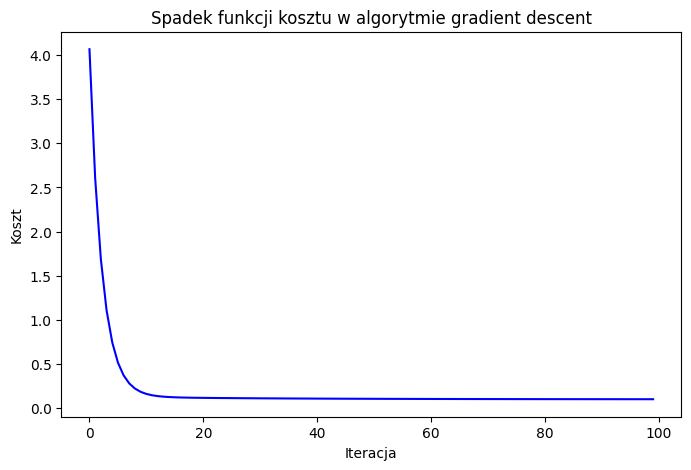

In [19]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = X.dot(theta)
        gradients = (1/m) * X.T.dot(predictions - y)
        theta = theta - alpha * gradients
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Przygotowanie danych: dodanie wyrazu wolnego (bias)
X_b = np.c_[np.ones((m, 1)), X]  # macierz X z kolumną jedynek
theta_initial = np.random.randn(2)
alpha = 0.1
iterations = 100

theta_opt, cost_history = gradient_descent(X_b, y, theta_initial, alpha, iterations)
print("Optymalne theta:", theta_opt)

# Wizualizacja spadku funkcji kosztu
plt.figure(figsize=(8,5))
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iteracja")
plt.ylabel("Koszt")
plt.title("Spadek funkcji kosztu w algorytmie gradient descent")
plt.show()


Na wykresie widać typowy przebieg procesu minimalizacji funkcji kosztu (np. Mean Squared Error) w algorytmie gradient descent:

Szybki spadek na początku:

Na pierwszych iteracjach funkcja kosztu dość gwałtownie maleje, co świadczy o skutecznym „kroku” w kierunku minimum.
Oznacza to, że współczynnik uczenia (
𝛼
α) jest prawdopodobnie dobrany na odpowiednim poziomie — nie jest ani zbyt duży (który mógłby prowadzić do oscylacji), ani zbyt mały (co skutkowałoby bardzo wolnym spadkiem kosztu).

Wypłaszczenie krzywej:

Po pewnej liczbie iteracji (w tym przypadku kilkunastu–kilkudziesięciu) funkcja kosztu osiąga bardzo niską wartość i jej dalsze zmiany są minimalne.
Świadczy to o tym, że algorytm zbliżył się do minimum (lub jego okolic) i kolejne iteracje nie wnoszą już dużych poprawek.

Interpretacja wartości końcowej:

Niska wartość kosztu oznacza, że model dobrze dopasował się do danych treningowych.
W praktyce warto sprawdzić również błąd (lub inną miarę jakości) na zbiorze walidacyjnym lub testowym, aby upewnić się, że nie dochodzi do nadmiernego dopasowania (overfittingu).

Możliwe modyfikacje:

Jeśli krzywa spadałaby bardzo wolno, można by rozważyć zwiększenie
𝛼
α.
Jeśli natomiast obserwowalibyśmy duże „skoki” kosztu, należałoby
𝛼
α zmniejszyć.

## 3. Regresja Wielomianowa

Regresja wielomianowa to rozszerzenie regresji liniowej, w którym model dopasowuje wielomian do danych, umożliwiając uchwycenie nieliniowych zależności między zmiennymi. Choć model jest nieliniowy względem oryginalnej cechy $x$, to pozostaje liniowy względem parametrów $\theta$, co umożliwia wykorzystanie standardowych metod dopasowywania, takich jak metoda najmniejszych kwadratów czy gradient prosty.

Dla stopnia $d$ model można zapisać jako:

$$
h_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2 + \dots + \theta_d x^d
$$

W praktyce, zamiast ręcznie tworzyć kolejne potęgi zmiennej $x$, używamy transformacji cech przy pomocy narzędzia *PolynomialFeatures* z biblioteki *scikit-learn*. Pozwala to automatycznie wygenerować dodatkowe kolumny odpowiadające kolejnym potęgom cechy, co upraszcza trenowanie modelu.

**Kluczowe kwestie przy regresji wielomianowej:**
- **Dobór stopnia wielomianu:** Zbyt niski stopień może prowadzić do niedouczenia (underfitting), natomiast zbyt wysoki – do przeuczenia (overfitting).
- **Skalowanie cech:** Transformacja cech może powodować duże różnice w wartościach (szczególnie dla wyższych potęg), dlatego skalowanie danych przed transformacją może pomóc w stabilizacji modelu.
- **Interpretacja współczynników:** Choć współczynniki są trudniejsze do interpretacji w modelach wielomianowych, taki model często lepiej dopasowuje się do złożonych zależności w danych.

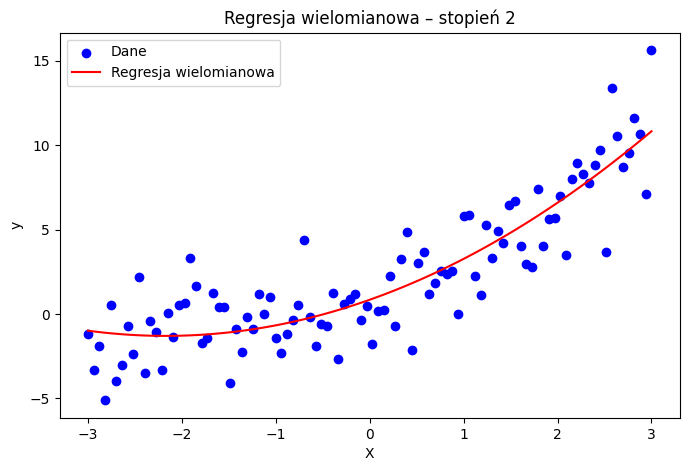

In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Generowanie danych: funkcja kwadratowa
X_poly = np.linspace(-3, 3, m).reshape(-1, 1)
y_poly = 1 + 2 * X_poly[:, 0] + 0.5 * X_poly[:, 0]**2 + np.random.randn(m) * 2

# Transformacja cech – stopień wielomianu = 2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly_features.fit_transform(X_poly)

# Dopasowanie modelu
poly_reg = LinearRegression()
poly_reg.fit(X_poly_transformed, y_poly)
y_poly_pred = poly_reg.predict(X_poly_transformed)

# Wizualizacja wyników
plt.figure(figsize=(8,5))
plt.scatter(X_poly, y_poly, color='blue', label='Dane')
plt.plot(X_poly, y_poly_pred, color='red', label='Regresja wielomianowa')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresja wielomianowa – stopień 2")
plt.legend()
plt.show()


## 4. Krzywe Uczenia (Learning Curves)

Krzywe uczenia przedstawiają zależność błędu treningowego i walidacyjnego od liczby przykładów treningowych. Służą do diagnozowania problemów z nadmiernym dopasowaniem (overfitting) lub niedouczeniem (underfitting). Analiza krzywych uczenia pozwala:
- Ocenić, czy model uczy się wraz z dodawaniem kolejnych przykładów.
- Zidentyfikować, czy model jest zbyt skomplikowany (overfitting) lub zbyt prosty (underfitting).
- Określić, czy warto zwiększyć rozmiar zbioru danych, czy też skupić się na modyfikacji modelu (np. przez regularyzację).

### Przykład – Wizualizacja krzywych uczenia

Poniższy przykład wykorzystuje funkcję `learning_curve` z biblioteki *scikit-learn* do wizualizacji krzywych uczenia dla modelu regresji liniowej.

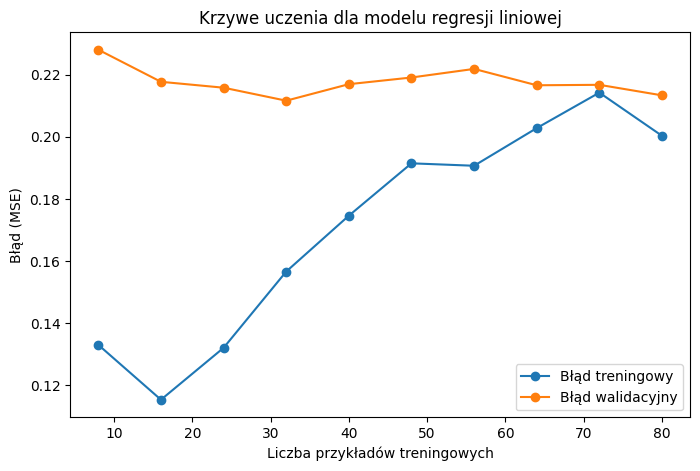

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

# Generowanie danych: zależność liniowa z szumem
m = 100
X = 2 * np.random.rand(m, 1)
y = 3 * X[:, 0] + 2 + np.random.randn(m) * 0.5

# Definicja modelu
model = LinearRegression()

# Wyznaczanie krzywych uczenia
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Obliczanie średniego błędu (zamieniamy ujemny MSE na MSE)
train_errors = -np.mean(train_scores, axis=1)
test_errors = -np.mean(test_scores, axis=1)

# Wizualizacja krzywych uczenia
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, 'o-', label='Błąd treningowy')
plt.plot(train_sizes, test_errors, 'o-', label='Błąd walidacyjny')
plt.xlabel("Liczba przykładów treningowych")
plt.ylabel("Błąd (MSE)")
plt.title("Krzywe uczenia dla modelu regresji liniowej")
plt.legend()
plt.show()


Na wykresie widać dwie krzywe:

Błąd treningowy (niebieski): zmienia się w zależności od wielkości zbioru treningowego.
Błąd walidacyjny (pomarańczowy): pokazuje, jak model radzi sobie na danych, których nie użyto do trenowania.

Zachowanie błędu treningowego

Przy niewielkiej liczbie przykładów treningowych (po lewej stronie wykresu) błąd treningowy jest stosunkowo niski. Model łatwo „nauczyć się” małego zbioru, często nawet przeuczając się do tych kilku przykładów.
W miarę wzrostu liczby przykładów treningowych błąd treningowy rośnie, bo trudniej idealnie dopasować się do coraz większego zbioru.

Zachowanie błędu walidacyjnego

Przy małej liczbie przykładów treningowych błąd walidacyjny bywa wyższy, ponieważ model ma niewiele danych do nauki i nie generalizuje dobrze.
Wraz ze wzrostem liczby danych, błąd walidacyjny zwykle maleje lub stabilizuje się, bo model uczy się lepiej uogólniać.
W tym konkretnym wykresie błąd walidacyjny waha się w okolicach 0.20–0.23 i nie spada drastycznie. Może to wskazywać, że model ma pewien poziom niedopasowania (underfitting) albo dane nie są wystarczająco zróżnicowane, by dalsze dokładanie przykładów istotnie poprawiało wyniki.

Interpretacja luki między błędami

Jeśli różnica między błędem treningowym a walidacyjnym jest duża, wskazuje to na potencjalne przeuczenie (overfitting).
Jeśli obie krzywe są blisko siebie, ale na wyższym poziomie błędu, może to oznaczać, że model jest zbyt prosty (underfitting).
Tutaj różnica jest umiarkowana: błąd treningowy wynosi ok. 0.18 przy większej liczbie przykładów, a błąd walidacyjny ~0.20–0.22. Różnica nie jest duża, co sugeruje, że przeuczenie nie jest znaczne, ale jednocześnie błąd walidacyjny nie jest bardzo niski, więc można rozważyć ulepszenie modelu (np. wzbogacenie go o dodatkowe cechy, inny algorytm czy tuning hiperparametrów).

Wnioski:

Jeśli zależy nam na niższym błędzie walidacyjnym, warto sprawdzić, czy możemy skorzystać z bardziej złożonego modelu (np. regresji wielomianowej, dodania nowych cech lub użycia innego algorytmu).
Warto też ocenić, czy dane nie zawierają zbyt dużego szumu lub czy nie brakuje istotnych zmiennych objaśniających.
Jeżeli dodanie większej liczby przykładów treningowych nie zmniejsza błędu walidacyjnego, być może potrzebne są inne formy optymalizacji (np. regularyzacja, inna architektura modelu itp.).
Podsumowując, wykres krzywych uczenia sugeruje, że model osiąga relatywnie stabilne wyniki – błąd treningowy rośnie z liczbą próbek (co jest normalne), a błąd walidacyjny oscyluje w pewnym zakresie i nie jest od niego znacząco większy. Aby jeszcze poprawić wyniki, można rozważyć większą złożoność modelu, lepsze przygotowanie cech albo dodatkowe dane treningowe.

## 5. Regularyzowane Modele Liniowe

### Teoria

Regularizacja służy do zapobiegania przeuczeniu poprzez karanie dużych wartości wag.  
Najpopularniejsze metody to:
- **Ridge (L2):** kara w postaci $ \lambda \sum_{j=1}^{n} \theta_j^2 $
- **Lasso (L1):** kara w postaci $ \lambda \sum_{j=1}^{n} |\theta_j| $
- **ElasticNet:** łączona kara L1 i L2

Regularizacja pomaga ograniczyć złożoność modelu, zmniejszyć wariancję i poprawić generalizację, szczególnie w sytuacjach, gdy mamy dużo cech lub gdy cechy są silnie skorelowane.




In [22]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

# Generowanie danych: 100 przykładów, 10 cech
m, n = 100, 10
X = np.random.randn(m, n)
# Ustalanie prawdziwych współczynników oraz generowanie y z dodatkiem szumu
true_coef = np.random.randn(n)
y = X.dot(true_coef) + np.random.randn(m) * 0.5

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definicja siatki hiperparametrów dla alpha (odpowiada lambda)
param_grid = {'alpha': np.logspace(-3, 3, 7)}

# Ridge Regression
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge Regression:")
print("Najlepsza wartość alpha (lambda):", best_alpha_ridge)
print("MSE na zbiorze testowym:", mse_ridge)
print("Współczynniki modelu:", ridge_best.coef_)

print("\nLasso Regression:")
print("Najlepsza wartość alpha (lambda):", best_alpha_lasso)
print("MSE na zbiorze testowym:", mse_lasso)
print("Współczynniki modelu:", lasso_best.coef_)


Ridge Regression:
Najlepsza wartość alpha (lambda): 1.0
MSE na zbiorze testowym: 0.2515260562033118
Współczynniki modelu: [ 1.38500536  0.90881335 -0.00143762 -0.62051606  0.70268027  0.32668225
  0.82275804  0.70280339  1.141284   -0.54190004]

Lasso Regression:
Najlepsza wartość alpha (lambda): 0.01
MSE na zbiorze testowym: 0.25220848987080596
Współczynniki modelu: [ 1.39501631  0.91093559 -0.         -0.61916511  0.70052685  0.32015075
  0.82188287  0.70085207  1.14518235 -0.538463  ]


## 6. Regresja Logistyczna

Regresja logistyczna jest algorytmem stosowanym w problemach klasyfikacyjnych, zwłaszcza przy klasyfikacji binarnej. W przeciwieństwie do regresji liniowej, która przewiduje wartości ciągłe, regresja logistyczna przewiduje prawdopodobieństwo, że dana obserwacja należy do jednej z dwóch klas.

Podstawą modelu jest funkcja logistyczna (sigmoid), która przekształca dowolną wartość rzeczywistą na przedział (0, 1):

$$
h_\theta(x)= \frac{1}{1+e^{-\theta^T x}}
$$

Wartość $h_\theta(x)$ interpretuje się jako prawdopodobieństwo, że obserwacja $x$ należy do klasy oznaczonej jako 1. Przy typowym progu decyzyjnym (np. 0.5) klasyfikujemy dane do jednej z dwóch kategorii.

Funkcja kosztu stosowana w regresji logistycznej to log-loss (lub cross-entropy), która mierzy jakość przewidywań modelu. Dla problemu klasyfikacji binarnej funkcja ta jest definiowana jako:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}\log\left(h_\theta(x^{(i)})\right) + (1-y^{(i)})\log\left(1-h_\theta(x^{(i)})\right) \right]
$$

Główne zalety regresji logistycznej to:
- **Interpretowalność:** Współczynniki modelu można interpretować jako wpływ poszczególnych cech na logarytm szans (log-odds) wystąpienia danej klasy.
- **Prostota:** Model jest stosunkowo prosty do implementacji i trenowania.
- **Optymalność:** Funkcja log-loss jest wypukła, co zapewnia unikalne minimum, a optymalizacja (np. metodą gradient descent) przebiega efektywnie.





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ustawienie ziarna losowości dla powtarzalności wyników
np.random.seed(42)

# Generowanie syntetycznego zbioru danych dla klasyfikacji binarnej
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, random_state=42)

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Dopasowanie modelu regresji logistycznej
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Przewidywanie etykiet na zbiorze testowym
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Dokładność modelu:", accuracy)
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))

# Wizualizacja granicy decyzyjnej
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, probs, alpha=0.7, levels=np.linspace(0, 1, 25), cmap='RdBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='RdBu', label='Dane testowe')
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.title("Granica decyzyjna dla regresji logistycznej")
plt.legend()
plt.show()


Na wykresie widać granice decyzyjne modelu regresji logistycznej w przestrzeni dwóch cech (Cecha 1 i Cecha 2). Kolorowe tło reprezentuje szacowane przez model prawdopodobieństwo przynależności do jednej z dwóch klas:

Czerwony odcień  wskazuje wyższe prawdopodobieństwo klasy 0.
Niebieski odcień wskazuje wyższe prawdopodobieństwo klasy 1.
Biały lub jasny odcień w środku oznacza obszar, w którym prawdopodobieństwo jest w okolicach 50%.
Punkty są rzeczywistymi obserwacjami z zestawu testowego:

Ich pozycja na wykresie określa wartości obu cech.
Kolor/oznaczenie punktów może wskazywać, do której klasy należą w rzeczywistości.

Liniowa granica decyzyjna
Model regresji logistycznej, mimo że wprowadza funkcję sigmoid, jest liniowy w przestrzeni cech (o ile nie dokonaliśmy nieliniowych przekształceń). Oznacza to, że granica decyzyjna jest prostą (lub hiperpłaszczyzną w wyższych wymiarach). Na wykresie widać zestaw równoległych linii, które odpowiadają różnym poziomom prawdopodobieństwa.

Interpretacja kolorów

Intensywny niebieski oznacza obszar, w którym model przewiduje wysokie prawdopodobieństwo klasy 1 (powyżej 0.5).
Intensywny czerwony oznacza obszar z wysokim prawdopodobieństwem klasy 0.
Strefa przejściowa (biała/jasna) to obszar, gdzie prawdopodobieństwo jest bliskie 0.5 – tu znajduje się faktyczna granica decyzyjna (model może „wahać się” co do klasy).
Rozmieszczenie punktów testowych

Punkty po lewej stronie (czerwonej) są częściej klasyfikowane jako klasa 0, a po prawej (niebieskiej) – jako klasa 1.
Rozkład punktów i to, czy znajdują się w „odpowiednim” kolorze, wskazuje, jak dobrze model rozdziela klasy w przestrzeni cech.
Ocena modelu

Jeżeli większość punktów z klasy 0 faktycznie znajduje się w obszarze czerwonym, a z klasy 1 w niebieskim, to model dobrze sobie radzi z rozdzielaniem klas.
Jeśli widzimy dużo punktów, które wbrew swojemu kolorowi (prawdziwej klasie) znajdują się po „niewłaściwej” stronie granicy decyzyjnej, może to świadczyć o niedokładności modelu.
Możliwe ulepszenia

Jeśli dane są nieliniowe, prosta granica decyzyjna może być niewystarczająca. Rozszerzenie modelu o dodatkowe cechy (np. wielomianowe) lub użycie metod nieliniowych (np. SVM z jądrem RBF) może poprawić dopasowanie.
Regularyzacja (np. L1/L2) może pomóc w unikaniu przeuczenia w sytuacjach z wieloma cechami.
Podsumowując, wykres pokazuje, że model regresji logistycznej wyznacza liniową (w 2D – prostą) granicę decyzyjną, a kolor tła informuje o szacowanym prawdopodobieństwie przynależności do poszczególnych klas. Punkty testowe pozwalają ocenić, jak dobrze granica odzwierciedla rzeczywisty podział danych.

## 7. Zadania

### Zadania do samodzielnego rozwiązania:

1. **Regresja Wielomianowa – Eksperyment:**  
   Zmodyfikuj stopień wielomianu i zaobserwuj wpływ na dopasowanie modelu. Spróbuj wyznaczyć optymalny stopień wykorzystując technikę walidacji krzyżowej.

 Odnośniki:
 - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

2. **Regularizacja – Analiza:**  
   Dla wygenerowanych danych z cechami skorelowanymi, wykonaj analizę wpływu wartości parametru $ \lambda $ w modelach Ridge oraz Lasso. Zinterpretuj otrzymane współczynniki.

 Odnośniki:
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

3. **Krzywe Uczenia – Interpretacja:**  
   Wykorzystując wybrany model (np. regresję liniową lub wielomianową), wygeneruj krzywe uczenia i zinterpretuj, czy model ma tendencję do overfittingu czy underfittingu.

 Odnośnik:
 - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html

4. **Regresja Logistyczna – Wyzwanie:**  
   Używając innego publicznego zbioru danych (np. z repozytorium UCI) dla problemu klasyfikacji binarnej, przeprowadź analizę wyników modelu oraz dokonaj strojenia hiperparametrów.

 Odnośniki:
 - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
 - https://archive.ics.uci.edu/ml/index.php

Najlepszy stopień wielomianu: 2


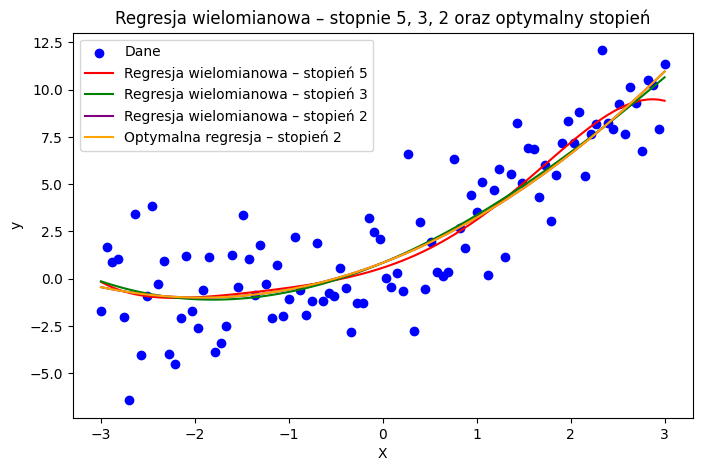

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

m = 100

X_poly = np.linspace(-3, 3, m).reshape(-1, 1)
y_poly = 1 + 2 * X_poly[:, 0] + 0.5 * X_poly[:, 0]**2 + np.random.randn(m) * 2

poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_transformed_5 = poly_features_5.fit_transform(X_poly)
poly_reg_5 = LinearRegression()
poly_reg_5.fit(X_poly_transformed_5, y_poly)
y_poly_pred_5 = poly_reg_5.predict(X_poly_transformed_5)

poly_features_3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly_transformed_3 = poly_features_3.fit_transform(X_poly)
poly_reg_3 = LinearRegression()
poly_reg_3.fit(X_poly_transformed_3, y_poly)
y_poly_pred_3 = poly_reg_3.predict(X_poly_transformed_3)

# Stopień 2
poly_features_2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed_2 = poly_features_2.fit_transform(X_poly)
poly_reg_2 = LinearRegression()
poly_reg_2.fit(X_poly_transformed_2, y_poly)
y_poly_pred_2 = poly_reg_2.predict(X_poly_transformed_2)

model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': np.arange(1, 10)}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_poly, y_poly)

best_degree = grid_search.best_params_['polynomialfeatures__degree']
print(f"Najlepszy stopień wielomianu: {best_degree}")

best_model = grid_search.best_estimator_
y_poly_pred_best = best_model.predict(X_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X_poly, y_poly, color='blue', label='Dane')

plt.plot(X_poly, y_poly_pred_5, color='red', label='Regresja wielomianowa – stopień 5')
plt.plot(X_poly, y_poly_pred_3, color='green', label='Regresja wielomianowa – stopień 3')
plt.plot(X_poly, y_poly_pred_2, color='purple', label='Regresja wielomianowa – stopień 2')
plt.plot(X_poly, y_poly_pred_best, color='orange', label=f'Optymalna regresja – stopień {best_degree}')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresja wielomianowa – stopnie 5, 3, 2 oraz optymalny stopień")
plt.legend()
plt.show()




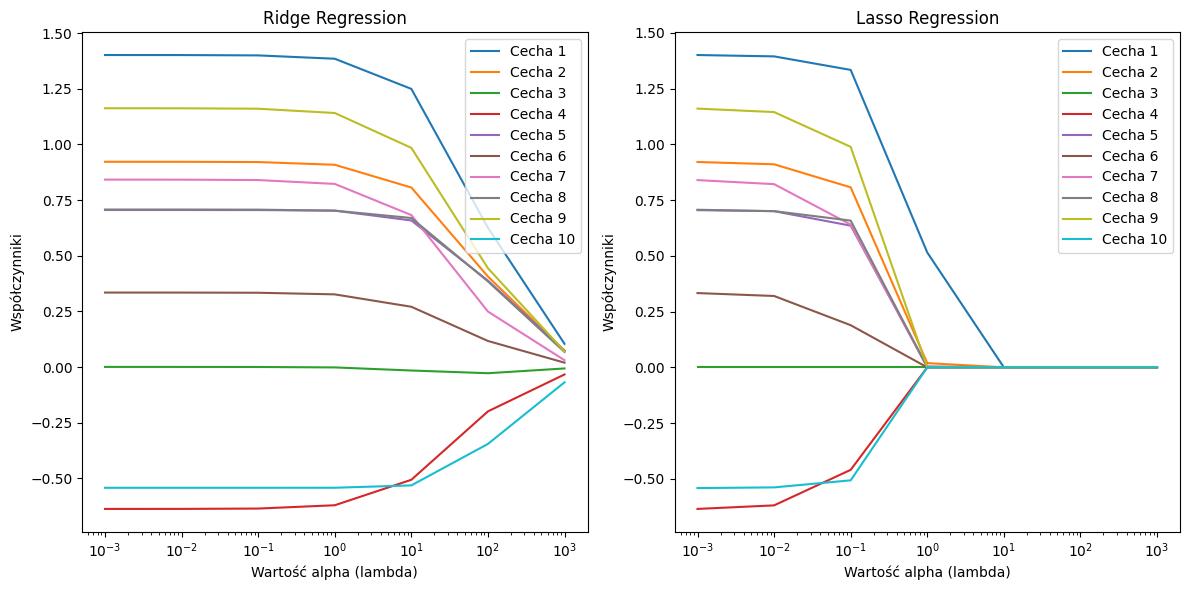

Ridge Regression:
Najlepsza wartość alpha (lambda): 1.0
MSE na zbiorze testowym: 0.2515260562033118
Współczynniki modelu: [ 1.38500536  0.90881335 -0.00143762 -0.62051606  0.70268027  0.32668225
  0.82275804  0.70280339  1.141284   -0.54190004]

Lasso Regression:
Najlepsza wartość alpha (lambda): 0.01
MSE na zbiorze testowym: 0.25220848987080596
Współczynniki modelu: [ 1.39501631  0.91093559 -0.         -0.61916511  0.70052685  0.32015075
  0.82188287  0.70085207  1.14518235 -0.538463  ]


In [24]:
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)

m, n = 100, 10
X = np.random.randn(m, n)
true_coef = np.random.randn(n)
y = X.dot(true_coef) + np.random.randn(m) * 0.5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'alpha': np.logspace(-3, 3, 7)}

ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
best_alpha_ridge = ridge_cv.best_params_['alpha']
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)
best_alpha_lasso = lasso_cv.best_params_['alpha']
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

alphas = np.logspace(-3, 3, 7)

ridge_coeffs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coeffs.append(ridge.coef_)

lasso_coeffs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_coeffs.append(lasso.coef_)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i in range(n):
    plt.plot(alphas, np.array(ridge_coeffs)[:, i], label=f'Cecha {i+1}')
plt.xscale('log')
plt.xlabel('Wartość alpha (lambda)')
plt.ylabel('Współczynniki')
plt.title('Ridge Regression')
plt.legend()

plt.subplot(1, 2, 2)
for i in range(n):
    plt.plot(alphas, np.array(lasso_coeffs)[:, i], label=f'Cecha {i+1}')
plt.xscale('log')
plt.xlabel('Wartość alpha (lambda)')
plt.ylabel('Współczynniki')
plt.title('Lasso Regression')
plt.legend()

plt.tight_layout()
plt.show()

print("Ridge Regression:")
print("Najlepsza wartość alpha (lambda):", best_alpha_ridge)
print("MSE na zbiorze testowym:", mse_ridge)
print("Współczynniki modelu:", ridge_best.coef_)

print("\nLasso Regression:")
print("Najlepsza wartość alpha (lambda):", best_alpha_lasso)
print("MSE na zbiorze testowym:", mse_lasso)
print("Współczynniki modelu:", lasso_best.coef_)


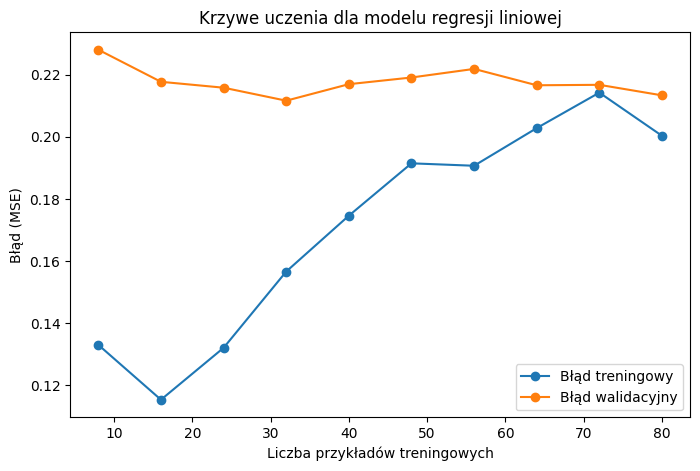

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 3 * X[:, 0] + 2 + np.random.randn(m) * 0.5

model = LinearRegression()

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_errors = -np.mean(train_scores, axis=1)
test_errors = -np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_errors, 'o-', label='Błąd treningowy')
plt.plot(train_sizes, test_errors, 'o-', label='Błąd walidacyjny')
plt.xlabel("Liczba przykładów treningowych")
plt.ylabel("Błąd (MSE)")
plt.title("Krzywe uczenia dla modelu regresji liniowej")
plt.legend()
plt.show()


Dokładność modelu: 0.9766081871345029

Raport klasyfikacji:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Macierz pomyłek:
 [[ 61   2]
 [  2 106]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Najlepsza wartość parametru C: 545.5594781168514


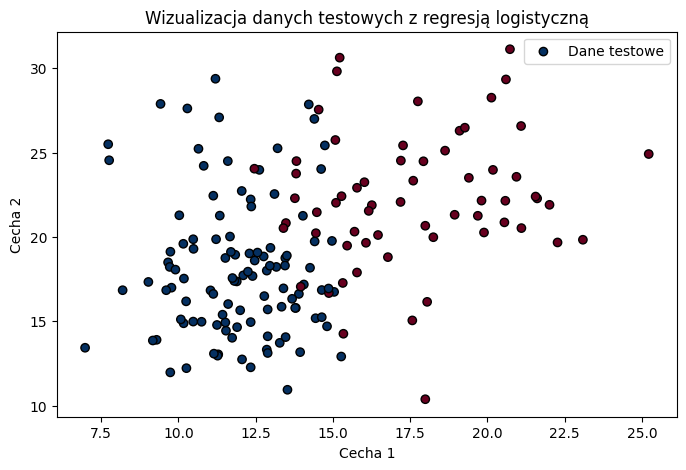


Raport klasyfikacji (po strojenie C):
               precision    recall  f1-score   support

           0       0.95      0.98      0.97        63
           1       0.99      0.97      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Macierz pomyłek (po strojenie C):
 [[ 62   1]
 [  3 105]]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Dokładność modelu:", accuracy)
print("\nRaport klasyfikacji:\n", classification_report(y_test, y_pred))
print("Macierz pomyłek:\n", confusion_matrix(y_test, y_pred))

param_grid = {'C': np.logspace(-4, 4, 20)}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_C = grid_search.best_params_['C']
print("\nNajlepsza wartość parametru C:", best_C)

log_reg_best = grid_search.best_estimator_
y_pred_best = log_reg_best.predict(X_test)

plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdBu', edgecolors='k', label='Dane testowe')
plt.xlabel("Cecha 1")
plt.ylabel("Cecha 2")
plt.title("Wizualizacja danych testowych z regresją logistyczną")
plt.legend()
plt.show()

print("\nRaport klasyfikacji (po strojenie C):\n", classification_report(y_test, y_pred_best))
print("Macierz pomyłek (po strojenie C):\n", confusion_matrix(y_test, y_pred_best))
